In [115]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  cross_val_score


In [116]:
df = pd.read_csv('../data/clean_game_data.csv', index_col=0)

In [117]:
cleandf = df.select_dtypes(include='number').drop(columns=['Year', 'Game ID'])
fig = px.imshow(cleandf.corr(), color_continuous_scale='RdBu', title='Correlation heatmap for all roles')
fig.update_layout(height=600, width=800)
fig.show()

As we can see here some features are correlated which would hinder the clustering process

In [118]:
cleandf_scaled = pd.DataFrame(StandardScaler().fit_transform(cleandf), columns=cleandf.columns)

In [119]:
# PCA

pca = PCA()
pca.fit(cleandf_scaled)

PCA()

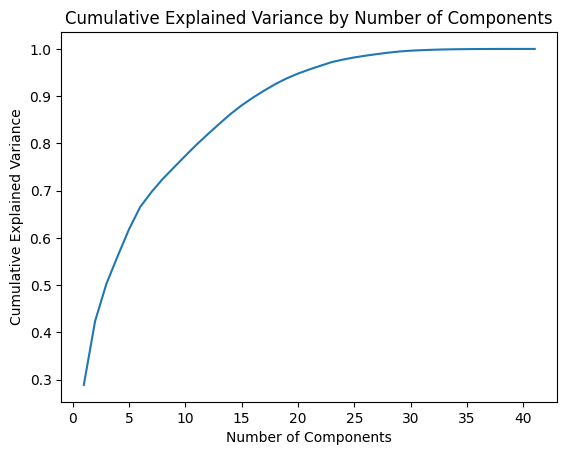

for at least 70.0% variance kept, we need 8 components
for at least 50.0% variance kept, we need 3 components


In [120]:
explained_variance = pca.explained_variance_ratio_
simple_exp_var = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_exp_var= pd.DataFrame(np.cumsum(explained_variance), columns=['Cumulative Explained Variance'])
exp_var = pd.concat([simple_exp_var, cumulative_exp_var], axis=1)

summary_table = pd.concat([simple_exp_var, cumulative_exp_var], axis=1)

plt.plot(range(1, len(explained_variance)+1), np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.show()

threshold = 0.7
threshold2 = 0.5
print(f"for at least {threshold * 100}% variance kept, we need {np.argmax(np.cumsum(explained_variance) > threshold) + 1} components")
print(f"for at least {threshold2 * 100}% variance kept, we need {np.argmax(np.cumsum(explained_variance) > threshold2) + 1} components")

In [125]:
import plotly.graph_objs as go

In [126]:
# Plotting the first two components

pca = PCA(n_components=8)
pca.fit(cleandf_scaled)
pca_df = pd.DataFrame(pca.transform(cleandf_scaled), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
df_reset = df.reset_index(drop=True)
pca_df['Role'] = df_reset['Role']

fig = px.scatter(pca_df, x='PC1', y='PC2', title='PCA plot of all roles, for PC1 and PC2', color=pca_df['Role'])
fig.update_layout(height=600, width=800)
fig.show()

# Correlation circle PC1 and PC2



circle = go.Scatter(
    x=[0],
    y=[0],
    mode="markers",
    marker=dict(size=0),
    showlegend=False
)

arrows = []
annotations = []
for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    arrows.append(go.Scatter(
        x=[0, pc1],
        y=[0, pc2],
        mode="lines+markers",
        line=dict(color="red", width=2),
        showlegend=False
    ))
    annotations.append(go.Scatter(
        x=[pc1],
        y=[pc2],
        text=cleandf.columns[i],
        mode="text",
        textposition="middle center",
        textfont=dict(color="blue"),
        showlegend=False
    ))

layout = go.Layout(
    title='Correlation circle for PC1 and PC2',
    xaxis=dict(title='PC1'),
    yaxis=dict(title='PC2'),
    width=700,
    height=700,
    shapes=[
        dict(
            type="circle",
            xref="x",
            yref="y",
            x0=-1,
            y0=-1,
            x1=1,
            y1=1,
            line=dict(color="black"),
        )
    ]
)

fig = go.Figure(data=[circle, *arrows, *annotations], layout=layout)
fig.show()



As we can see, PC1 seems to set in the positive side rows that are related to gold, CS & Damage (inflicted), Kills.
While it is more neutral for differnetial rows (@15 rows).
Vision related rows are more skewed to the negative.

PC1 seem to set in the positive the rows that contribute to the aggressiveness of a player, while negative seem to be attributed to rows that are considered more supportive (vision, assists)

On PC2, Deaths are skewed on the negative while DMG%, CS, GOLD% is rather neutral.
All the other rows are in the positive.

PC2 is more difficult to identify, as we might think that negative would mean that this row contributes negatively to the game and positive would suggest that it contributes positively. But CSM is a rather in the negative albeit at around 0.05 value.

Considering this interpretation of the components.

We can see that Mid, Top, AD are rather similar in these aspects as their respective cluster are relatively similar.
Support is definitely more of a supportive role, and jungle seem to be some sort of middle ground where the cluster also seem to cross on the supportive area.

In [127]:
fig = px.scatter(pca_df, x='PC1', y='PC3', title='PCA plot of all roles, for PC1 and PC3', color=pca_df['Role'])
fig.update_layout(height=600, width=800)
fig.show()

# Create a trace for each arrow and text annotation
arrows = []
annotations = []
for i, (pc1, pc3) in enumerate(zip(pca.components_[0], pca.components_[2])):
    arrows.append(go.Scatter(
        x=[0, pc1],
        y=[0, pc3],
        mode="lines+markers",
        line=dict(color="red", width=2),
        showlegend=False
    ))
    annotations.append(go.Scatter(
        x=[pc1],
        y=[pc3],
        text=cleandf.columns[i],
        mode="text",
        textposition="middle center",
        textfont=dict(color="blue"),
        showlegend=False
    ))

layout = go.Layout(
    title='Correlation circle for PC1 and PC3',
    xaxis=dict(title='PC1'),
    yaxis=dict(title='PC3'),
    width=700,
    height=700,
    shapes=[
        dict(
            type="circle",
            xref="x",
            yref="y",
            x0=-1,
            y0=-1,
            x1=1,
            y1=1,
            line=dict(color="black"),
        )
    ]
)

fig = go.Figure(data=[circle, *arrows, *annotations], layout=layout)
fig.show()

For PC3 it's even harder to say.

From what we can see, it looks like on the negative side there are rows that are more advesarial/confrontational compared to the enemy such as the differential stats and kills, assists, wards placed etc...

While the positive side seems to hover gold held, damage de champions, damage, game duration, CS in team's jungle..., which could suggest some sort of game progession?

In that regard, junglers seem to impact game progression slightly more than other roles in terms of game progression while being less advesarial to the opponent.